In [1]:
from keras.datasets import cifar10
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [2]:
print("訓練資料維度:", x_train.shape)
print("測試資料維度:", x_test.shape)

訓練資料維度: (50000, 32, 32, 3)
測試資料維度: (10000, 32, 32, 3)


In [3]:
labels = {0:"飛機", 1:"車", 2:"鳥", 3:"貓",
          4:"鹿", 5:"狗", 6:"青蛙", 7:"馬",
          8:"船", 9:"卡車"}

第幾張圖片: 26664
是什麼東西: 船


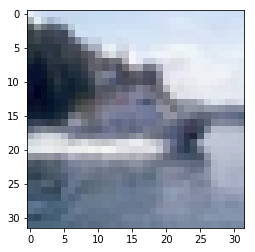

In [4]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
i = random.randint(0, x_train.shape[0])
print("第幾張圖片:", i)
# 以前[0, 1, 2, 1...] -> keras[ [0], [1], [2], [1] ]
print("是什麼東西:", labels[y_train[i][0]])
plt.imshow(x_train[i])

In [5]:
from keras.utils import np_utils
x_train_normal = x_train.astype(float) / 255
x_test_normal = x_test.astype(float) / 255
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from os.path import exists
from keras.models import load_model
if exists("cnn0811.h5"):
    print("已經有存了, Load")
    model = load_model("cnn0811.h5")
else:
    model = Sequential()
    model.add(Conv2D(filters = 32,
                     input_shape = (32, 32, 3),
                     kernel_size = (3, 3),
                     activation = 'relu',
                     padding='same'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters = 64,
                     kernel_size = (3, 3),
                     activation = 'relu',
                     padding='same'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.25))
    model.add(Dense(units = 256, activation = "relu"))
    model.add(Dropout(0.25))
    model.add(Dense(units = 10, activation = "softmax"))
    model.summary()

已經有存了, Load


In [7]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [8]:
train_history = model.fit(x_train_normal, y_train_cat, batch_size=200, epochs=10, validation_split=0.1, verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/1
 - 139s - loss: 0.7162 - acc: 0.7488 - val_loss: 0.7481 - val_acc: 0.7484


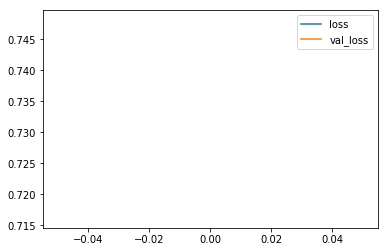

In [9]:
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.legend(['loss', 'val_loss'], loc="upper right")

In [10]:
model.evaluate(x_test_normal, y_test_cat)

10000/10000 [==============================] - 8s 765us/step


[0.7751667338371276, 0.7324]

In [11]:
model.save("cnn0811.h5")